# Setup

In [9]:
import sys
assert sys.version_info >=(3, 7)

import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from util_func import *


# Exercise 1

1. Write a program to segment the boat and the people on it from the background. Follow the instruction below:
- Use 'boat.jpg' as input.
- Apply Otsu thresholding.
- Draw bounding box to identify the region where the boat and people are located.

In [ ]:
# Load the image
image_path = 'images/boat.jpg'
image = cv.imread(image_path, cv.IMREAD_COLOR)

# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise and improve contour detection
blurred = cv.GaussianBlur(gray, (5, 5), 0)

# Apply OTSU thresholding
thresh = cv.threshold(gray, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]

# Find contours in the thresholded image
contours, _ = cv.findContours(thresh, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Define a minimum area threshold for contour filtering
min_area = 1000

# Iterate through the contours and draw bounding boxes
for contour in contours:
    area = cv.contourArea(contour)
    if area > min_area:
        x, y, w, h = cv.boundingRect(contour)
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the result
cv.imshow('Segmented Image', image)
cv.waitKey(0)
cv.destroyAllWindows()

# Exercise 2

2. Write a program to visualize the effect of size of structuring element on the morphological transformation (e.g. erosion, dilation, opening, and closing).

- Load the 'leaf.jfif' and perform thresholding to segment the leaf from the background.
- Create a GUI containing trackbar to control the size of structuring element and display the resulting image on a window alongside the trackbar.

In [2]:
import cv2 as cv

def apply_morphology(img, operation, size):
    kernel = cv.getStructuringElement(cv.MORPH_RECT, (size, size))
    
    if operation == 'erosion':
        result = cv.erode(img, kernel, iterations=1)
    elif operation == 'dilation':
        result = cv.dilate(img, kernel, iterations=1)
    elif operation == 'opening':
        result = cv.morphologyEx(img, cv.MORPH_OPEN, kernel)
    elif operation == 'closing':
        result = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel)
    else:
        result = img
    
    return result

def on_trackbar_change(val):
    size = cv.getTrackbarPos('Size', 'Morphological Transformation')
    
    if size % 2 == 0:
        size += 1
    
    transformed_image = apply_morphology(binary_image, selected_operation, size)
    cv.imshow('Morphological Transformation', transformed_image)

# Load the image
image_path = 'images/leaf.jfif'
image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Perform thresholding to segment the leaf from the background
_, binary_image = cv.threshold(image, 128, 255, cv.THRESH_BINARY)

# Create a GUI window with trackbar
cv.namedWindow('Morphological Transformation')
cv.createTrackbar('Size', 'Morphological Transformation', 3, 21, on_trackbar_change)

operations = ['erosion', 'dilation', 'opening', 'closing']
selected_operation = operations[0]

print("Press 'e' for erosion, 'd' for dilation, 'o' for opening, 'c' for closing")

# Initialize with the first operation
on_trackbar_change(0)

while True:
    key = cv.waitKey(0) & 0xFF
    
    if key == ord('e'):
        selected_operation = 'erosion'
        on_trackbar_change(0)
    elif key == ord('d'):
        selected_operation = 'dilation'
        on_trackbar_change(0)
    elif key == ord('o'):
        selected_operation = 'opening'
        on_trackbar_change(0)
    elif key == ord('c'):
        selected_operation = 'closing'
        on_trackbar_change(0)
    elif key == 27:  # Press Esc to exit
        break

cv.destroyAllWindows()

Press 'e' for erosion, 'd' for dilation, 'o' for opening, 'c' for closing


# Exercise 3

3. Apply the steps shown in exercise 4 to segment the porcelain from these images: "porcelain1.jfif" - "porcelain5.jfif".


In [37]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors
from matplotlib import cm

C:\Users\wenji\AppData\Local\Temp\ipykernel_6720\2033450775.py:65: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131), plt.imshow(img), plt.title("Original Image")


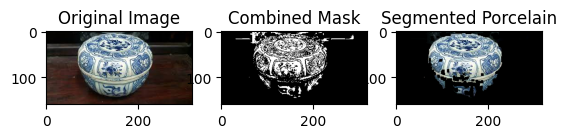

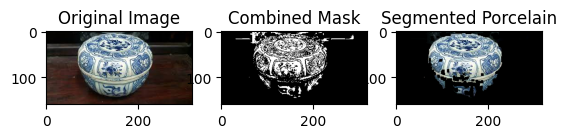

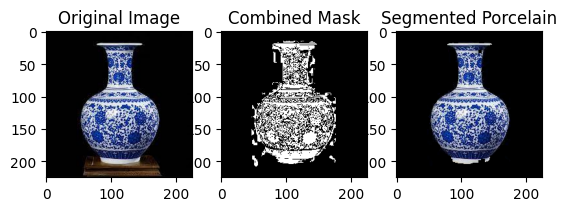

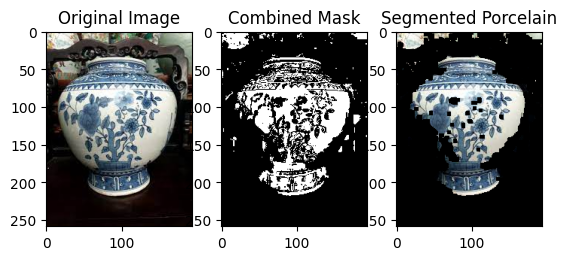

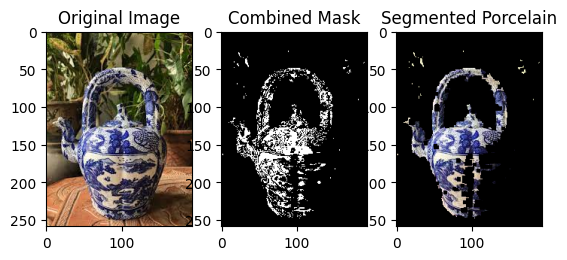

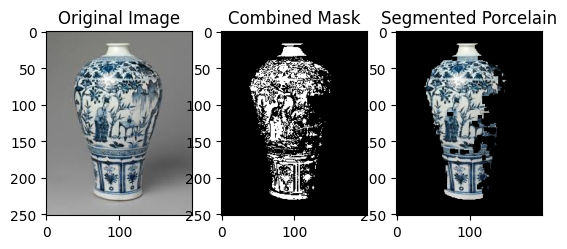

In [70]:
# Method 1

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

def color_seg(img, white_low, white_high, blue_low, blue_high, smooth=True):
    img_ori = img.copy()
    
    if smooth: 
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    mask = cv.inRange(img_hsv, blue_low, blue_high)
    
    mask = cv.erode(mask, None, iterations=2)
    mask = cv.dilate(mask, None, iterations=2)
    
    return cv.bitwise_and(img_ori, img_ori, mask=mask)

def img_segmentation(img):
    r, g, b = cv.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
    norm = colors.Normalize()
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolors=pixel_colors, marker=".")
    axis.view_init(elev=10, azim=240)
    axis.set_xlabel("red")
    axis.set_ylabel("green")
    axis.set_zlabel("blue")

    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(img_hsv)
    #fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolors=pixel_colors, marker=".")
    axis.view_init(elev=30, azim=300)
    axis.set_xlabel("hue")
    axis.set_ylabel("saturation")
    axis.set_zlabel("value")

    blue_low = (85, 90, 0)
    blue_high = (125, 255, 160)
    white_low = (0, 0, 200)
    white_high = (255, 50, 255)

    mask_blue = cv.inRange(img_hsv, blue_low, blue_high)
    mask_white = cv.inRange(img_hsv, white_low, white_high)
    combined_mask = cv.bitwise_or(mask_blue, mask_white)

    kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
    cleaned_mask = cv.morphologyEx(combined_mask, cv.MORPH_CLOSE, kernel)

    segmented_porcelain = cv.bitwise_and(img, img, mask=cleaned_mask)

    plt.subplot(131), plt.imshow(img), plt.title("Original Image")
    plt.subplot(132), plt.imshow(combined_mask, cmap='gray'), plt.title("Combined Mask")
    plt.subplot(133), plt.imshow(segmented_porcelain), plt.title("Segmented Porcelain")
    plt.show()

img_path = 'images/color_space/porcelain1.jfif'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_segmentation(img)

blue_low = (85, 90, 0)
blue_high = (125, 255, 160)
white_low = (0, 0, 200)
white_high = (255, 50, 255)

imgs = []
for i in range(1, 6):
    img = cv.imread(f'images/color_space/porcelain{i}.jfif')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res = [img_segmentation(im) for im in imgs]


C:\Users\wenji\AppData\Local\Temp\ipykernel_6720\3510798079.py:68: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131), plt.imshow(img), plt.title("Original Image")


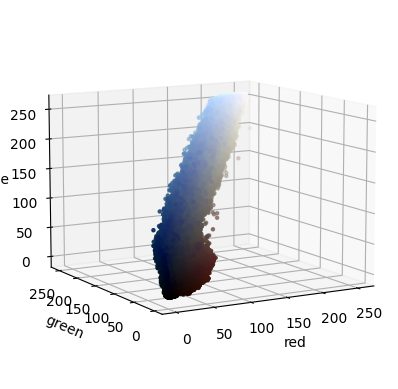

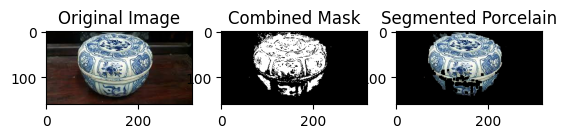

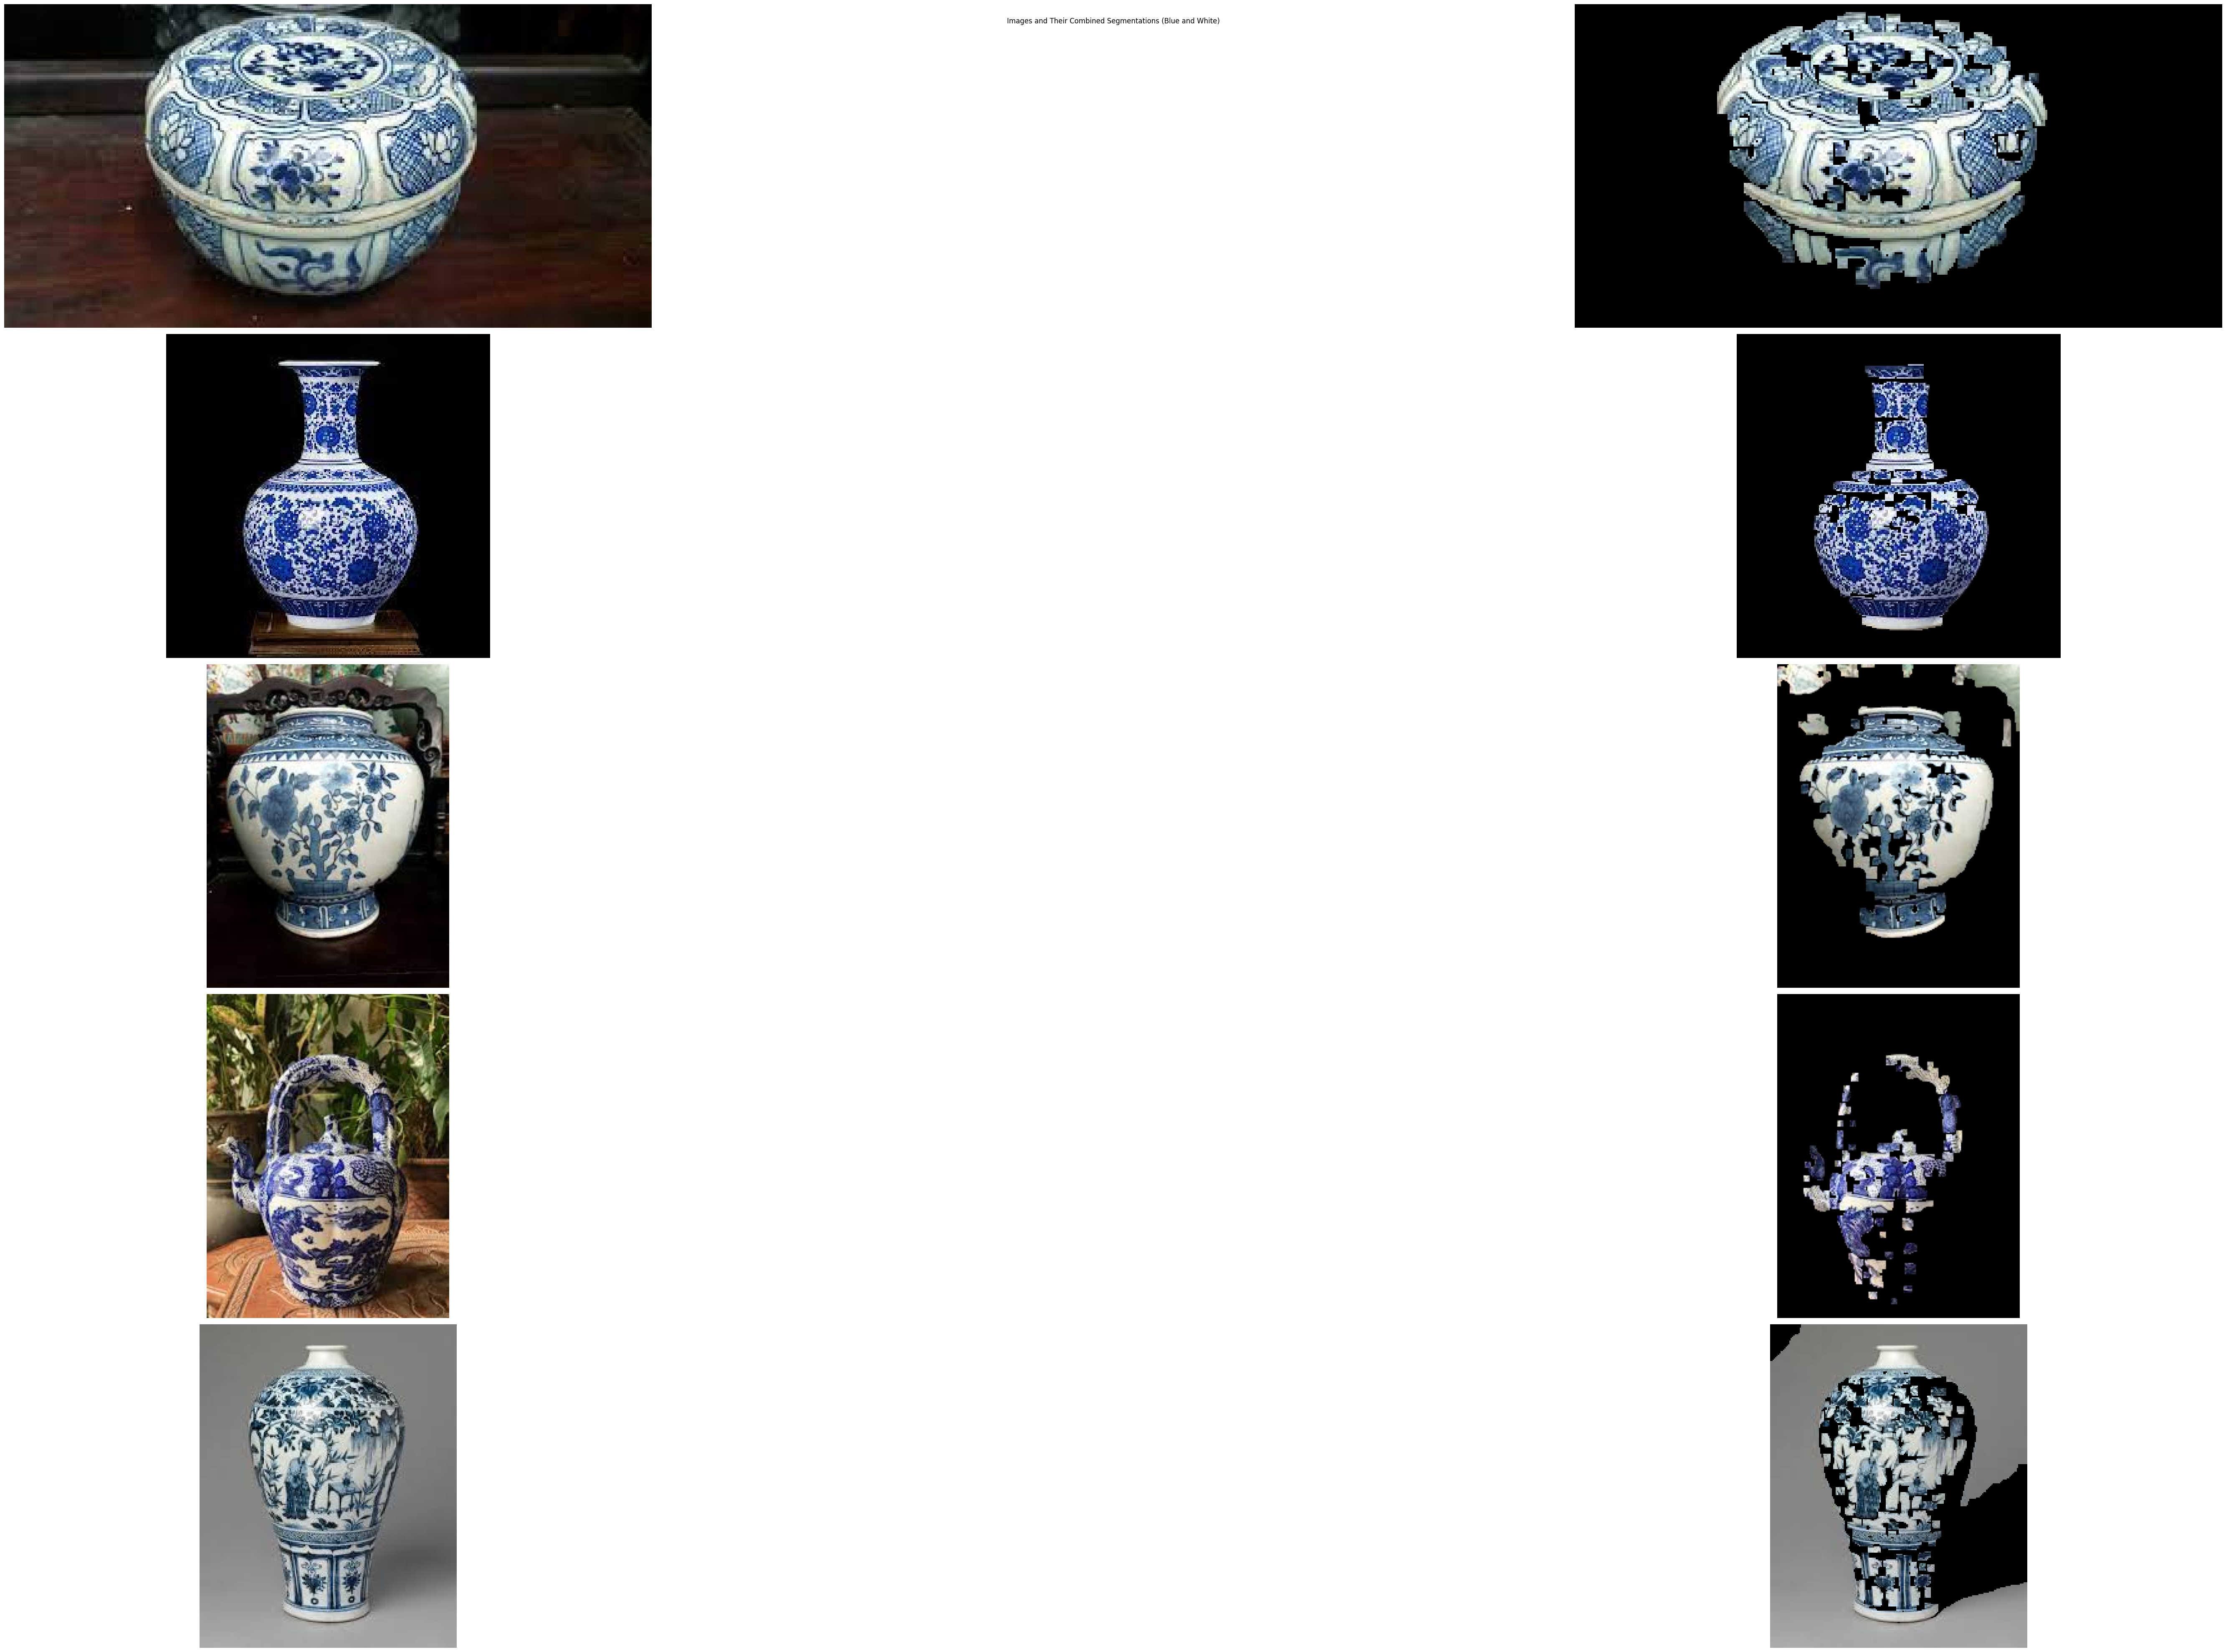

In [69]:
# Method 2

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

def color_seg(img, color_ranges, smooth=True):
    img_ori = img.copy()
    
    if smooth: 
        img = cv.GaussianBlur(img, (5, 5), 0)
    
    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    
    combined_mask = np.zeros(img.shape[:2], dtype=np.uint8)
    
    for color_low, color_high in color_ranges:
        mask = cv.inRange(img_hsv, color_low, color_high)
        mask = cv.erode(mask, None, iterations=2)
        mask = cv.dilate(mask, None, iterations=2)
        combined_mask = cv.bitwise_or(combined_mask, mask)
    
    return cv.bitwise_and(img_ori, img_ori, mask=combined_mask)


def img_segmentation(img):
    r, g, b = cv.split(img)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    pixel_colors = img.reshape((img.shape[0]*img.shape[1], 3))
    norm = colors.Normalize()
    norm.autoscale(pixel_colors)
    pixel_colors = norm(pixel_colors).tolist()

    axis.scatter(r.ravel(), g.ravel(), b.ravel(), facecolors=pixel_colors, marker=".")
    axis.view_init(elev=10, azim=240)
    axis.set_xlabel("red")
    axis.set_ylabel("green")
    axis.set_zlabel("blue")

    img_hsv = cv.cvtColor(img, cv.COLOR_RGB2HSV)
    h, s, v = cv.split(img_hsv)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")

    axis.scatter(h.ravel(), s.ravel(), v.ravel(), facecolors=pixel_colors, marker=".")
    axis.view_init(elev=30, azim=300)
    axis.set_xlabel("hue")
    axis.set_ylabel("saturation")
    axis.set_zlabel("value")
    
    blue_low = (90, 50, 50)
    blue_high = (130, 255, 255)

    white_low = (0, 0, 200)
    white_high = (255, 50, 255)

    mask_blue = cv.inRange(img_hsv, blue_low, blue_high)
    mask_white = cv.inRange(img_hsv, white_low, white_high)
    combined_mask = cv.bitwise_or(mask_blue, mask_white)

    kernel = cv.getStructuringElement(cv.MORPH_RECT, (5, 5))
    cleaned_mask = cv.morphologyEx(combined_mask, cv.MORPH_CLOSE, kernel)

    segmented_porcelain = cv.bitwise_and(img, img, mask=cleaned_mask)

    plt.subplot(131), plt.imshow(img), plt.title("Original Image")
    plt.subplot(132), plt.imshow(combined_mask, cmap='gray'), plt.title("Combined Mask")
    plt.subplot(133), plt.imshow(segmented_porcelain), plt.title("Segmented Porcelain")
    plt.show()

img_path = 'images/color_space/porcelain1.jfif'
img = cv.imread(img_path)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_segmentation(img)

blue_low = (90, 50, 50)
blue_high = (130, 255, 255)

white_low = (0, 0, 120)
white_high = (255, 50, 255)

color_ranges = [(blue_low, blue_high), (white_low, white_high)]

imgs = []
for i in range(1, 6):
    img = cv.imread(f'images/color_space/porcelain{i}.jfif')
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)

res_combined = [color_seg(im, color_ranges) for im in imgs]

fig, ax = plt.subplots(5, 2, figsize=(100, 40))

for i in range(5):
    ax[i][0].imshow(imgs[i])
    ax[i][0].axis("off")
    ax[i][1].imshow(res_combined[i])
    ax[i][1].axis("off")

fig.suptitle("Images and Their Combined Segmentations (Blue and White)")
plt.tight_layout()
plt.show()